In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [5]:
# Ładowanie danych
file_path = "D:/Julia/Szkolenia/Data Science_ Infoshare Academy/Projekt II- Spotify/archive/Final database.csv"
data = pd.read_csv(file_path)

C:\Users\julia\AppData\Local\Temp\ipykernel_17812\160540090.py:3: DtypeWarning: Columns (7,8,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


In [7]:
# Wstępne spojrzenie na dane
print("Podgląd danych:")
print(data.head())


Podgląd danych:
       Country                                                Uri  Popularity  \
0       Global  https://open.spotify.com/track/6FyRXC8tJUh863J...    31833.95   
1          USA  https://open.spotify.com/track/6FyRXC8tJUh863J...        8.00   
2    Argentina  https://open.spotify.com/track/6FyRXC8tJUh863J...    76924.40   
3      Belgium  https://open.spotify.com/track/6FyRXC8tJUh863J...      849.60   
4  Switzerland  https://open.spotify.com/track/6FyRXC8tJUh863J...    20739.10   

        Title        Artist Album/Single              Genre Artist_followers  \
0  adan y eva  Paulo Londra       single  argentine hip hop       11427104.0   
1  adan y eva  Paulo Londra       single  argentine hip hop       11427104.0   
2  adan y eva  Paulo Londra       single  argentine hip hop       11427104.0   
3  adan y eva  Paulo Londra       single  argentine hip hop       11427104.0   
4  adan y eva  Paulo Londra       single  argentine hip hop       11427104.0   

  Explicit      

In [8]:
#Podstawowe informacje o danych
print("\nInformacje o danych:")
print(data.info())


Informacje o danych:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170633 entries, 0 to 170632
Columns: 151 entries, Country to Cluster
dtypes: float64(58), int64(65), object(28)
memory usage: 196.6+ MB
None


In [9]:
#Podsumowanie statystyczne
print("\nPodsumowanie statystyczne:")
print(data.describe())


Podsumowanie statystyczne:
          Popularity  Days_since_release  Released_after_2017  Explicit_false  \
count  170633.000000       167411.000000        167411.000000   170633.000000   
mean     5417.616264         1337.530228             0.845667        0.651287   
std     13115.854526         2453.554101             0.361269        0.476564   
min         0.800000            9.000000             0.000000        0.000000   
25%        77.600000          428.000000             1.000000        0.000000   
50%       515.150000          834.000000             1.000000        1.000000   
75%      3867.850000         1240.000000             1.000000        1.000000   
max    233766.900000        44128.000000             1.000000        1.000000   

       Explicit_true          album    compilation         single  \
count  170633.000000  170633.000000  170633.000000  170633.000000   
mean        0.348684       0.549149       0.015026       0.435795   
std         0.476555       0.497580

OCZYSZCZANIE DANYCH

In [10]:
#Sprawdzanie brakujących wartości
missing_values = data.isnull().sum()
print("\nBrakujące wartości w kolumnach:")
print(missing_values)


Brakujące wartości w kolumnach:
Country        0
Uri            0
Popularity     0
Title          0
Artist         0
              ..
USA            0
Popu_max       0
Top10_dummy    0
Top50_dummy    0
Cluster        0
Length: 151, dtype: int64


Z powyższej analizy wynika, że dataset został już wcześniej oczyszczony z brakujących wartości, lub w ogóle ich nie posiadał.

In [12]:
# Usuwanie duplikatów
data.drop_duplicates(inplace=True)

#print("\nInformacje o danych:")
#print(data.info()



Informacje o danych:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170633 entries, 0 to 170632
Columns: 151 entries, Country to Cluster
dtypes: float64(58), int64(65), object(28)
memory usage: 196.6+ MB
None


Dataset nie posiadał również duplikujących się wierszy.

In [13]:
# Sprawdzanie poprawności typów danych
print("\nTypy danych po oczyszczaniu:")
print(data.dtypes)


Typy danych po oczyszczaniu:
Country         object
Uri             object
Popularity     float64
Title           object
Artist          object
                ...   
USA              int64
Popu_max         int64
Top10_dummy    float64
Top50_dummy    float64
Cluster         object
Length: 151, dtype: object


ANALIZA STATYSTYCZNA

In [26]:
from datetime import datetime

In [33]:
#Tworzymy kolumne mówiącą o ilości dni w rankingu
from datetime import datetime

# Upewnij się, że 'release_date' jest w formacie daty
data['Release_date'] = pd.to_datetime(data['Release_date'], errors='coerce')

# Usuń wiersze z brakującą datą wydania
data = data[data['Release_date'].notnull()]

# Określ datę 5 listopada 2020
release_reference_date = pd.Timestamp('2020-11-05')

# Oblicz różnicę w dniach
data['days_since_release'] = (release_reference_date - data['Release_date']).dt.days

# Podgląd danych z nową kolumną
print(data[['Release_date', 'days_since_release']])



       Release_date  days_since_release
0        2018-11-05                 731
1        2018-11-05                 731
2        2018-11-05                 731
3        2018-11-05                 731
4        2018-11-05                 731
...             ...                 ...
170628   2017-07-07                1217
170629   2019-12-26                 315
170630   2017-06-28                1226
170631   2012-11-20                2907
170632   2017-07-11                1213

[167412 rows x 2 columns]


In [21]:
# Najbardziej popularni wykonawcy - łączna liczba dni w rankingu
artist_popularity = data.groupby('Artist')['Popularity'].count().sort_values(ascending=False).head(10)
print("\nNajbardziej popularni wykonawcy (wg wskaźnika okreslonego przez twórców datasetu):")
print(artist_popularity)


Najbardziej popularni wykonawcy (wg wskaźnika okreslonego przez twórców datasetu):
Artist
Ariana Grande    1487
Drake            1473
BTS              1376
Taylor Swift     1285
XXXTENTACION      989
Ed Sheeran        911
The Weeknd        881
Linkin Park       798
Eminem            786
Billie Eilish     777
Name: Popularity, dtype: int64


In [34]:
# Najbardziej popularni wykonawcy - łączna liczba dni w rankingu
artist_popularity = data.groupby('Artist')['days_since_release'].count().sort_values(ascending=False).head(10)
print("\nNajbardziej popularni wykonawcy (wg liczby dni w rankingu):")
print(artist_popularity)


Najbardziej popularni wykonawcy (wg liczby dni w rankingu):
Artist
Ariana Grande    1487
Drake            1466
BTS              1376
Taylor Swift     1285
XXXTENTACION      989
The Weeknd        881
Linkin Park       788
Eminem            786
Billie Eilish     777
Ed Sheeran        750
Name: days_since_release, dtype: int64


In [48]:
# Najbardziej popularne utwory 
track_popularity = data.groupby('Title').agg(
    popularity=('Popularity', 'mean'),
    days_in_chart=('days_since_release', 'count')
).sort_values(by='days_in_chart', ascending=False).head(10)

print("\nNajbardziej popularne utwory:")
print(track_popularity)



Najbardziej popularne utwory:
                    popularity  days_in_chart
Title                                        
intro               560.689698            199
jingle bell rock   1617.668662            142
all night          4813.847857            140
rockstar          30374.801812            138
paradise           4355.870588            136
stay              10407.761111            135
mama              10077.596241            133
falling           13163.418504            127
friends           18389.725984            127
christmas           734.167917            120


In [59]:
# Liczba unikalnych utworów w roku
data['Release_date'] = pd.to_datetime(data['Release_date'], errors='coerce')
data['year'] = data['Release_date'].dt.year
unique_tracks_per_year = data.groupby('year')['Title'].nunique().sort_values(ascending=False).head(10)
print("\nLiczba unikalnych utworów w rankingu na przestrzeni lat:")
print(unique_tracks_per_year)



Liczba unikalnych utworów w rankingu na przestrzeni lat:
year
2019    11666
2018    11599
2020    10596
2017     9942
2016     2610
2015      925
2014      537
2013      453
2012      368
2011      349
Name: Title, dtype: int64


In [42]:
# Analiza współwystępowania artystów w rankingu (np. kolaboracje)
artist_combinations = data.groupby(['Artist', 'Title']).size().reset_index(name='count')
collaborations = artist_combinations[artist_combinations['count'] > 1]
print("\nNajczęściej współwystępujący artyści (kolaboracje):")
print(collaborations.head(10))


Najczęściej współwystępujący artyści (kolaboracje):
                                             Artist  \
4                                      #LikeMe Cast   
15            $hirak - Henkie T - Boef - ADF Samski   
19  $hirak - SBMG - Boef - Lil Kleine - Ronnie Flex   
21                                      $uicideBoy$   
22                                      $uicideBoy$   
25                                      $uicideBoy$   
26                                      $uicideBoy$   
27                                      $uicideBoy$   
32                                      $uicideBoy$   
34                                      $uicideBoy$   

                                                Title  count  
4                                    soldiers of love      2  
15                                          spiritual      2  
19                                          miljonair      2  
21  ...and to those i love, thanks for sticking ar...      4  
22                        

WIZUALIZACJA DANYCH

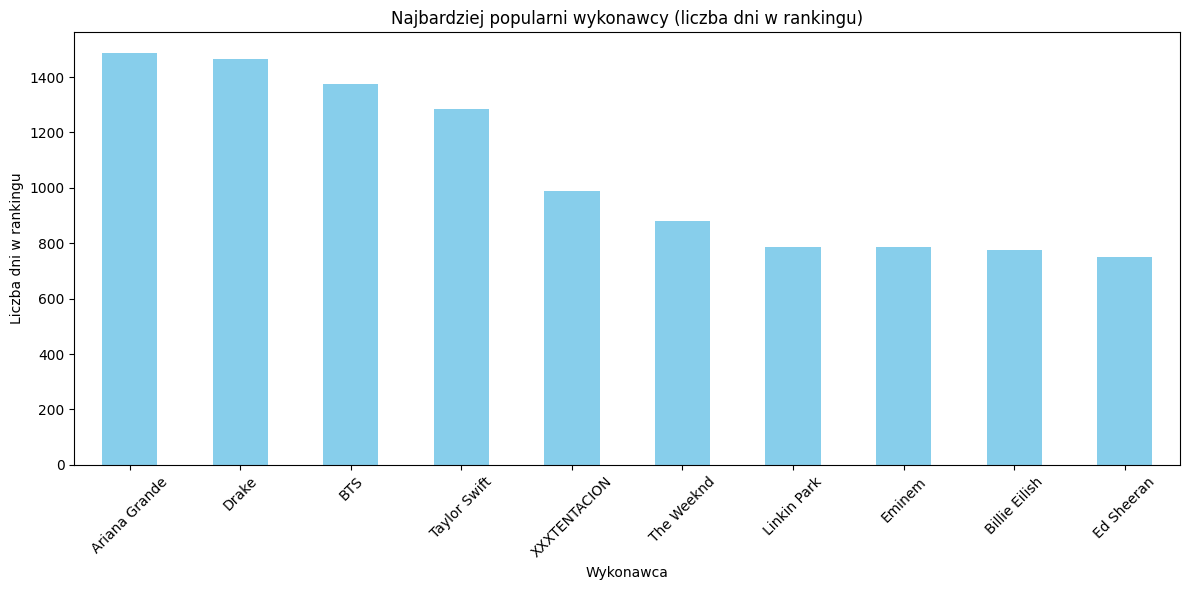

In [43]:
# Popularność wykonawców - wykres słupkowy
plt.figure(figsize=(12, 6))
artist_popularity.plot(kind='bar', color='skyblue')
plt.title("Najbardziej popularni wykonawcy (liczba dni w rankingu)")
plt.xlabel("Wykonawca")
plt.ylabel("Liczba dni w rankingu")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

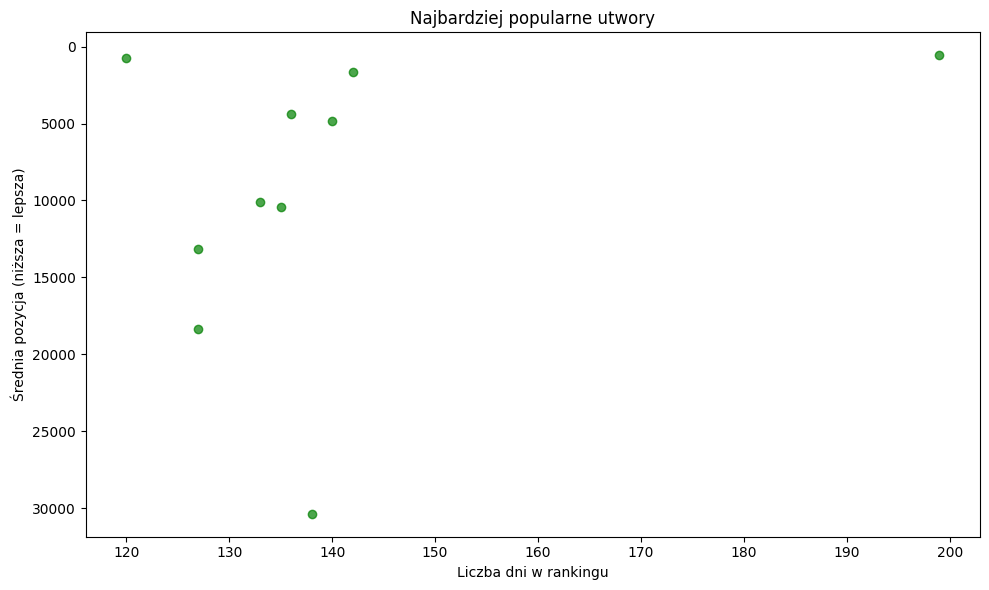

In [58]:
# Najbardziej popularne utwory - wykres punktowy (średnia pozycja vs liczba dni)
plt.figure(figsize=(10, 6))
plt.scatter(track_popularity['days_in_chart'], track_popularity['popularity'], color='green', alpha=0.7)
plt.title("Najbardziej popularne utwory")
plt.xlabel("Liczba dni w rankingu")
plt.ylabel("Średnia pozycja (niższa = lepsza)")
plt.gca().invert_yaxis()  # Odwrócenie osi Y (niższa pozycja jest lepsza)
plt.tight_layout()
plt.show()

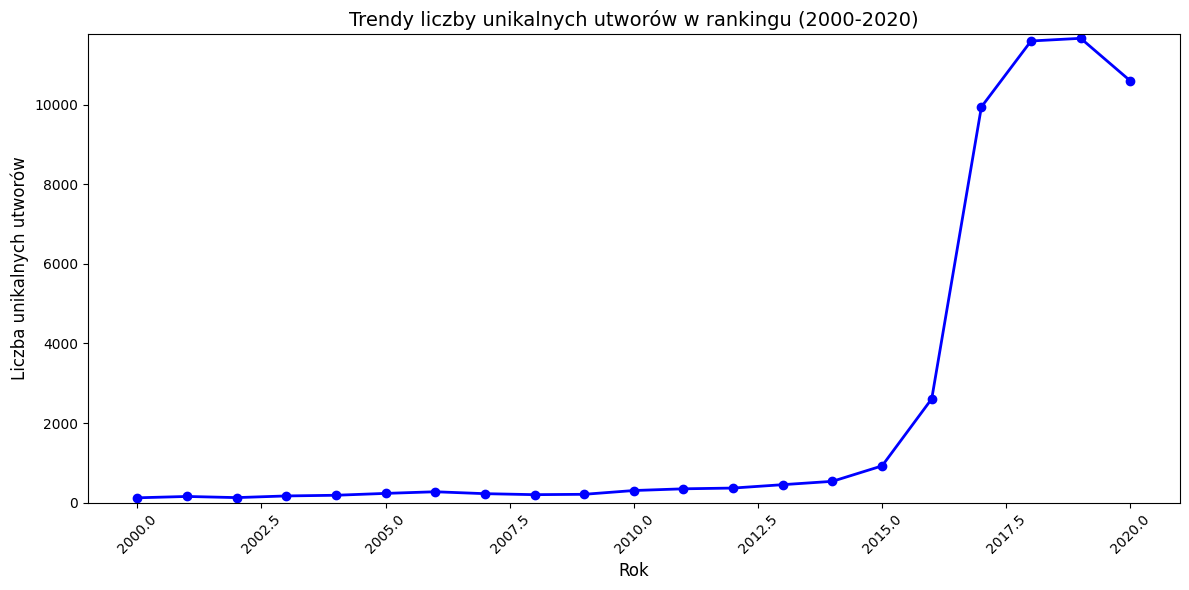

In [ ]:
# Przygotowanie kolumny 'Release_date'
data['Release_date'] = pd.to_datetime(data['Release_date'], errors='coerce')
data['year'] = data['Release_date'].dt.year
data_filtered = data[(data['year'] >= 2000) & (data['year'] <= 2020)]
unique_tracks_per_year = data_filtered.groupby('year')['Title'].nunique()

#Tworzenie wykresu
plt.figure(figsize=(12, 6))
plt.plot(unique_tracks_per_year.index, unique_tracks_per_year.values, color='blue', marker='o', linestyle='-', linewidth=2, markersize=6)
plt.title("Trendy liczby unikalnych utworów w rankingu (2000-2020)", fontsize=14)
plt.xlabel("Rok", fontsize=12)
plt.ylabel("Liczba unikalnych utworów", fontsize=12)
plt.xticks(rotation=45)
plt.ylim(0, unique_tracks_per_year.max() + 100)
plt.tight_layout()
plt.show()


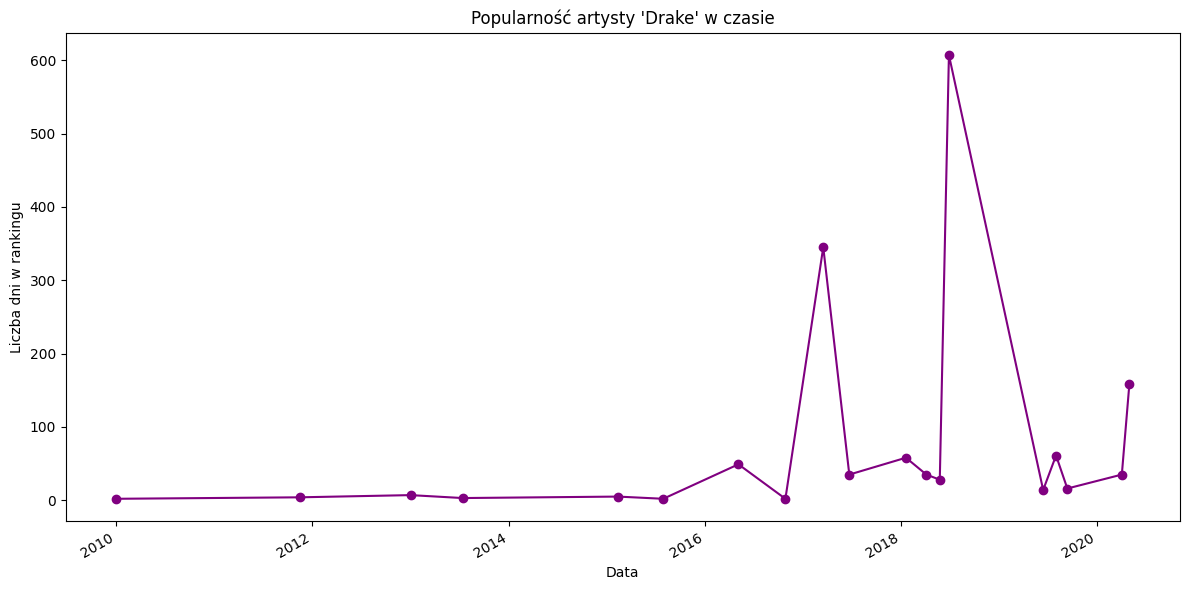

In [46]:
# Popularność wybranego artysty w czasie
example_artist = "Drake"  # Podmień na wybranego artystę
artist_trend = data[data['Artist'] == example_artist].groupby('Release_date').size()
plt.figure(figsize=(12, 6))
artist_trend.plot(color='purple', marker='o')
plt.title(f"Popularność artysty '{example_artist}' w czasie")
plt.xlabel("Data")
plt.ylabel("Liczba dni w rankingu")
plt.tight_layout()
plt.show()